In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import os
from FACS_Sampling.utils import create_adata

sc.set_figure_params(figsize=(8,8), fontsize=15, )

In [14]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
import warnings
warnings.filterwarnings("ignore")

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.4 pandas==2.1.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.3 pynndescent==0.5.11


In [2]:

# Get the file path from the environment variable
file_path_env = os.getenv('MY_FACS_DATA_PATH')
input_file1 = os.path.join(file_path_env,'sara_data',"adata_ref_sara_2M.h5ad")
input_file2 = os.path.join(file_path_env,'sara_data', 'reps',"random_adata_2_30__0.h5ad")
input_file3 = os.path.join(file_path_env,'sara_data', 'reps',"fsbs_adata_2_30__0.h5ad")
input_file4 = os.path.join(file_path_env,'sara_data', "atomic_indices.csv")

adata_ref = sc.read_h5ad(input_file1)
adata_random = sc.read_h5ad(input_file2)
adata_fsbs =  sc.read_h5ad(input_file3)
atomic_indices = pd.read_csv(input_file4)

In [3]:
atomic_indices

,x
0,10
1,20
2,28
3,64
4,83
...,...
142995,1999957
142996,1999974
142997,1999978
142998,1999987


In [4]:
atomic_indices = atomic_indices['x'].values

In [5]:
label_key = 'population'

In [6]:
null_values = adata_ref.obs.isna()


In [7]:
import time

# Your code here



In [8]:
# sc.tl.pca(adata_ref, svd_solver='arpack', n_comps=21)

In [9]:
# sc.pl.pca(adata_ref, color='population')

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [11]:


# np.random.seed(0)

# # Standardizing the data (important for PCA)
# scaler = StandardScaler()
# data_standardized = scaler.fit_transform(data)

# # Performing PCA
# pca = PCA(n_components=2)  # reducing to 2 dimensions for example
# principal_components = pca.fit_transform(data_standardized)

# # Outputs
# explained_variance = pca.explained_variance_ratio_
# singular_values = pca.singular_values_

# # Converting the principal components to a DataFrame for better visualization
# principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# # Displaying results
# principal_df.head(), explained_variance, singular_values



In [12]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(adata_ref.X)
# adata_ref.X = data_standardized
# X = adata_ref.X
X = data_standardized

In [13]:
from sklearn.decomposition import PCA
import time

In [14]:
start_time = time.time()
pca = PCA(n_components=22)

# Fit PCA on your data
pca.fit(X)

# Transform the data to the PCA space
X_pca = pca.transform(X)

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.460024356842041 seconds


In [17]:
s = 0
for i in pca.explained_variance_ratio_:
    s+=i
    print(s)

0.29592413746988705
0.39933094747724557
0.46757214478962594
0.5313156740429339
0.5829585479993559
0.6322833186156164
0.6734315334659184
0.7125902142890637
0.7472429430830352
0.7808135664120581
0.8123476499804552
0.8410939167569117
0.8676558168000448
0.891363084342542
0.9128693971658466
0.933142086908023
0.9509516512236701
0.9665818540560721
0.9782997389087865
0.9871390562715463
0.9945220241401707
1.0000000000000002


In [12]:
def bin_sample_2d(df, s_size=20, n_bins=10, seed=12345):
    np.random.seed(seed)
    
    # Determine bin edges for both dimensions
    x_edges = np.linspace(df.iloc[:, 0].min(), df.iloc[:, 0].max(), n_bins + 1)
    y_edges = np.linspace(df.iloc[:, 1].min(), df.iloc[:, 1].max(), n_bins + 1)

    # Digitize assigns each data point to a bin
    x_bins = np.digitize(df.iloc[:, 0], x_edges)
    y_bins = np.digitize(df.iloc[:, 1], y_edges)

    # Combine x and y bins to form unique keys for each grid cell
    df['grid_cell'] = [(x, y) for x, y in zip(x_bins, y_bins)]

    # Group by grid cells
    grouped = df.groupby('grid_cell')

    # Sample from each group
    sampled_indices = []
    for _, group in grouped:
        indices = group.index
        if len(indices) > s_size:
            sampled_indices.extend(np.random.choice(indices, s_size, replace=False))
        else:
            sampled_indices.extend(indices)

    # Result as unique indices
    return np.unique(sampled_indices)



In [13]:
import numpy as np
import pandas as pd

def bin_sample_3d(adata, s_size=20, n_bins=10, seed=12345):
    np.random.seed(seed)
    
    # Determine bin edges for all three dimensions
    x_edges = np.linspace(adata.iloc[:, 0].min(), adata.iloc[:, 0].max(), n_bins + 1)
    y_edges = np.linspace(adata.iloc[:, 1].min(), adata.iloc[:, 1].max(), n_bins + 1)
    z_edges = np.linspace(adata.iloc[:, 2].min(), adata.iloc[:, 2].max(), n_bins + 1)

    # Digitize assigns each data point to a bin in each dimension
    x_bins = np.digitize(adata.iloc[:, 0], x_edges)
    y_bins = np.digitize(adata.iloc[:, 1], y_edges)
    z_bins = np.digitize(adata.iloc[:, 2], z_edges)

    # Combine x, y, and z bins to form unique keys for each grid cell
    adata['grid_cell'] = [(x, y, z) for x, y, z in zip(x_bins, y_bins, z_bins)]

    # Group by grid cells
    grouped = adata.groupby('grid_cell')

    # Sample from each group
    sampled_indices = []
    for _, group in grouped:
        indices = group.index
        if len(indices) > s_size:
            sampled_indices.extend(np.random.choice(indices, s_size, replace=False))
        else:
            sampled_indices.extend(indices)

    # Result as unique indices
    return np.unique(sampled_indices)


In [38]:
import numpy as np
import pandas as pd

def bin_sample_4d(adata, s_size=20, n_bins=10, seed=12345):
    np.random.seed(seed)
    
    # Determine bin edges for all three dimensions
    x_edges = np.linspace(adata.iloc[:, 0].min(), adata.iloc[:, 0].max(), n_bins + 1)
    y_edges = np.linspace(adata.iloc[:, 1].min(), adata.iloc[:, 1].max(), n_bins + 1)
    z_edges = np.linspace(adata.iloc[:, 2].min(), adata.iloc[:, 2].max(), n_bins + 1)
    a_edges = np.linspace(adata.iloc[:, 3].min(), adata.iloc[:, 3].max(), n_bins + 1)

    # Digitize assigns each data point to a bin in each dimension
    x_bins = np.digitize(adata.iloc[:, 0], x_edges)
    y_bins = np.digitize(adata.iloc[:, 1], y_edges)
    z_bins = np.digitize(adata.iloc[:, 2], z_edges)
    a_bins = np.digitize(adata.iloc[:, 3], a_edges)

    # Combine x, y, and z bins to form unique keys for each grid cell
    adata['grid_cell'] = [(x, y, z, a) for x, y, z, a in zip(x_bins, y_bins, z_bins, a_bins)]

    # Group by grid cells
    grouped = adata.groupby('grid_cell')

    # Sample from each group
    sampled_indices = []
    for _, group in grouped:
        indices = group.index
        if len(indices) > s_size:
            sampled_indices.extend(np.random.choice(indices, s_size, replace=False))
        else:
            sampled_indices.extend(indices)

    # Result as unique indices
    return np.unique(sampled_indices)


In [18]:
start_time = time.time()

df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'PC4': X_pca[:, 3],
    'Label': list(adata_ref.obs['population'].values) 
})

# output = bin_sample_2d(df, n_bins=40, s_size= 405 )


elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.27258872985839844 seconds


# TEST

In [19]:
adata = df.copy()
s_size=6
n_bins=39
seed=12345

np.random.seed(seed)

# Determine bin edges for all three dimensions
x_edges = np.linspace(adata.iloc[:, 0].min(), adata.iloc[:, 0].max(), n_bins + 1)
y_edges = np.linspace(adata.iloc[:, 1].min(), adata.iloc[:, 1].max(), n_bins + 1)
z_edges = np.linspace(adata.iloc[:, 2].min(), adata.iloc[:, 2].max(), n_bins + 1)
a_edges = np.linspace(adata.iloc[:, 3].min(), adata.iloc[:, 3].max(), n_bins + 1)

# Digitize assigns each data point to a bin in each dimension
x_bins = np.digitize(adata.iloc[:, 0], x_edges)
y_bins = np.digitize(adata.iloc[:, 1], y_edges)
z_bins = np.digitize(adata.iloc[:, 2], z_edges)
a_bins = np.digitize(adata.iloc[:, 3], a_edges)




In [26]:
# Combine x, y, and z bins to form unique keys for each grid cell
adata['grid_cell'] = [(x, y, z, a) for x, y, z, a in zip(x_bins, y_bins, z_bins, a_bins)]

# Group by grid cells
grouped = adata.groupby('grid_cell')

# Sample from each group

In [35]:
adata['grid_cell'].value_counts().keys()

Index([(20, 15, 16, 20), (19, 15, 16, 20),  (9, 14, 16, 21), (19, 13, 17, 22),
       (19, 14, 16, 20), (20, 14, 16, 20), (20, 14, 16, 21), (19, 12, 17, 22),
        (9, 15, 16, 21), (19, 14, 16, 21),
       ...
       (12, 14, 18, 11), (15, 10, 23, 18),  (19, 5, 14, 17),  (13, 8, 15, 25),
       (12, 15, 21, 24), (13, 25, 22, 17),  (6, 10, 18, 25), (11, 19, 18, 13),
        (14, 9, 20, 14), (21, 12, 22, 10)],
      dtype='object', name='grid_cell', length=32002)

In [54]:
(adata['grid_cell'].value_counts().values>100).sum()

3710

In [40]:
import numpy as np
import pandas as pd

def bin_sample_4d(adata, s_size=20, n_bins=10, seed=12345, c=1.5, min_single_sample_bins=5):
    np.random.seed(seed)
    
    # Function to create bins and digitize
    def create_bins_and_digitize(data, n_bins):
        edges = np.linspace(data.min(), data.max(), n_bins + 1)
        bins = np.digitize(data, edges)
        return bins

    # Function to check single sample bins and adjust if needed
    def check_and_adjust_bins(adata, n_bins, ):
        print(f'number of bins is {n_bins}.')
        x_bins = create_bins_and_digitize(adata.iloc[:, 0], n_bins)
        y_bins = create_bins_and_digitize(adata.iloc[:, 1], n_bins)
        z_bins = create_bins_and_digitize(adata.iloc[:, 2], n_bins)
        a_bins = create_bins_and_digitize(adata.iloc[:, 3], n_bins)

        # Combine bins to form grid cells
        adata['grid_cell'] = [(x, y, z, a) for x, y, z, a in zip(x_bins, y_bins, z_bins, a_bins)]

        # Group by grid cells and count samples in each
        grouped = adata.groupby('grid_cell').size()

        # Check if number of single-sample bins is below threshold
        single_sample_bins = grouped[grouped == 1]
        print(len(single_sample_bins))
        if len(single_sample_bins) < min_single_sample_bins:
            return False, grouped, 0
        elif len(single_sample_bins) > min_single_sample_bins*1.01:
            return False, grouped, 1
        return True, grouped, 0

    # Initial check
    sufficient_bins, grouped, check = check_and_adjust_bins(adata, n_bins)

    # Increase bin size and re-bin if necessary
    while not sufficient_bins:
        n_bins = int(n_bins * c)
        sufficient_bins, grouped, check = check_and_adjust_bins(adata, n_bins)
        if check:
            n_bins = n_bins * (3/8)

    # Get indices from bins with exactly one sample
    single_sample_bins = grouped[grouped == 1].index
    sampled_indices = adata[adata['grid_cell'].isin(single_sample_bins)].index

    return sampled_indices


In [19]:
import numpy as np
import pandas as pd

# def bin_sample_4d(adata, s_size=20, initial_n_bins=10, seed=12345, min_single_sample_bins=100000):
def bin_sample_4d(adata, seed=12345, min_single_sample_bins=100000):
    np.random.seed(seed)
    
    # Function to create bins and digitize
    def create_bins_and_digitize(data, n_bins):
        edges = np.linspace(data.min(), data.max(), n_bins + 1)
        bins = np.digitize(data, edges)
        return bins

    # Function to compute single sample bins
    def compute_single_sample_bins(adata, n_bins):
        x_bins = create_bins_and_digitize(adata.iloc[:, 0], n_bins)
        y_bins = create_bins_and_digitize(adata.iloc[:, 1], n_bins)
        z_bins = create_bins_and_digitize(adata.iloc[:, 2], n_bins)
        a_bins = create_bins_and_digitize(adata.iloc[:, 3], n_bins)

        # Combine bins to form grid cells
        adata['grid_cell'] = [(x, y, z, a) for x, y, z, a in zip(x_bins, y_bins, z_bins, a_bins)]

        # Group by grid cells and count samples in each
        grouped = adata.groupby('grid_cell').size()

        # Return single sample bins
        return grouped[grouped == 1]

    
    
    # Check if number of single-sample bins is below threshold
    n_bins = 50
    single_sample_bins = compute_single_sample_bins(adata, n_bins)
    print(len(single_sample_bins))
    while len(single_sample_bins) < min_single_sample_bins:
        # Increase bin size and re-bin if necessary
        n_bins = int(n_bins * 2)
        single_sample_bins = compute_single_sample_bins(adata, n_bins)
        print(len(single_sample_bins))

        
    initial_n_bins = n_bins
    

    # Binary search setup
    low = 1
    # high = initial_n_bins * 2
    high = initial_n_bins * 2
    n_bins = initial_n_bins
    while low <= high:
        n_bins = (low + high) // 2
        single_sample_bins = compute_single_sample_bins(adata, n_bins)
        if len(single_sample_bins) > min_single_sample_bins * 1.01:
            high = n_bins - 1
            print(f'range is  : {low} - {high}.')
        elif len(single_sample_bins) < min_single_sample_bins:
            low = n_bins + 1
            print(f'range is  : {low} - {high}.')
        else:
            break

    # Get indices from bins with exactly one sample
    single_sample_bins = compute_single_sample_bins(adata, n_bins).index
    sampled_indices = adata[adata['grid_cell'].isin(single_sample_bins)].index

    return sampled_indices, n_bins


In [20]:
start_time = time.time()

# output = bin_sample_4d(df, n_bins=1, c=2, min_single_sample_bins=122000)
output = bin_sample_4d(df, min_single_sample_bins=5000)


elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

19523
range is  : 1 - 49.
range is  : 26 - 49.
range is  : 26 - 36.
range is  : 32 - 36.
range is  : 32 - 33.
range is  : 32 - 31.
Elapsed time: 16.389679670333862 seconds


In [21]:
output[0].shape

(5320,)

In [22]:
out4d = output[0].values

In [23]:
out4d.shape

(5320,)

In [ ]:
sampled_indices = []
for _, group in grouped:
    indices = group.index
    if len(indices) > s_size:
        sampled_indices.extend(np.random.choice(indices, s_size, replace=False))
    else:
        sampled_indices.extend(indices)

    # Result as unique indices
    return np.unique(sampled_indices)

# End of TEST

In [149]:
output.shape

(121277,)

In [92]:
start_time = time.time()

output_3d = bin_sample_3d(df, n_bins=40, s_size= 47 )


elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.0300960540771484 seconds


In [93]:
output_3d.shape

(121535,)

In [95]:
# start_time = time.time()

# output_4d = bin_sample_4d(df, n_bins=39, s_size= 6 )


# elapsed_time = time.time() - start_time
# print(f"Elapsed time: {elapsed_time} seconds")

In [153]:
output_4d.shape

(121230,)

In [96]:
adata_random

AnnData object with n_obs × n_vars = 121676 × 22
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population'

In [154]:
# df.loc[output]

In [55]:
# df_sam = df.sample(2000)
df_sam = df.loc[output]

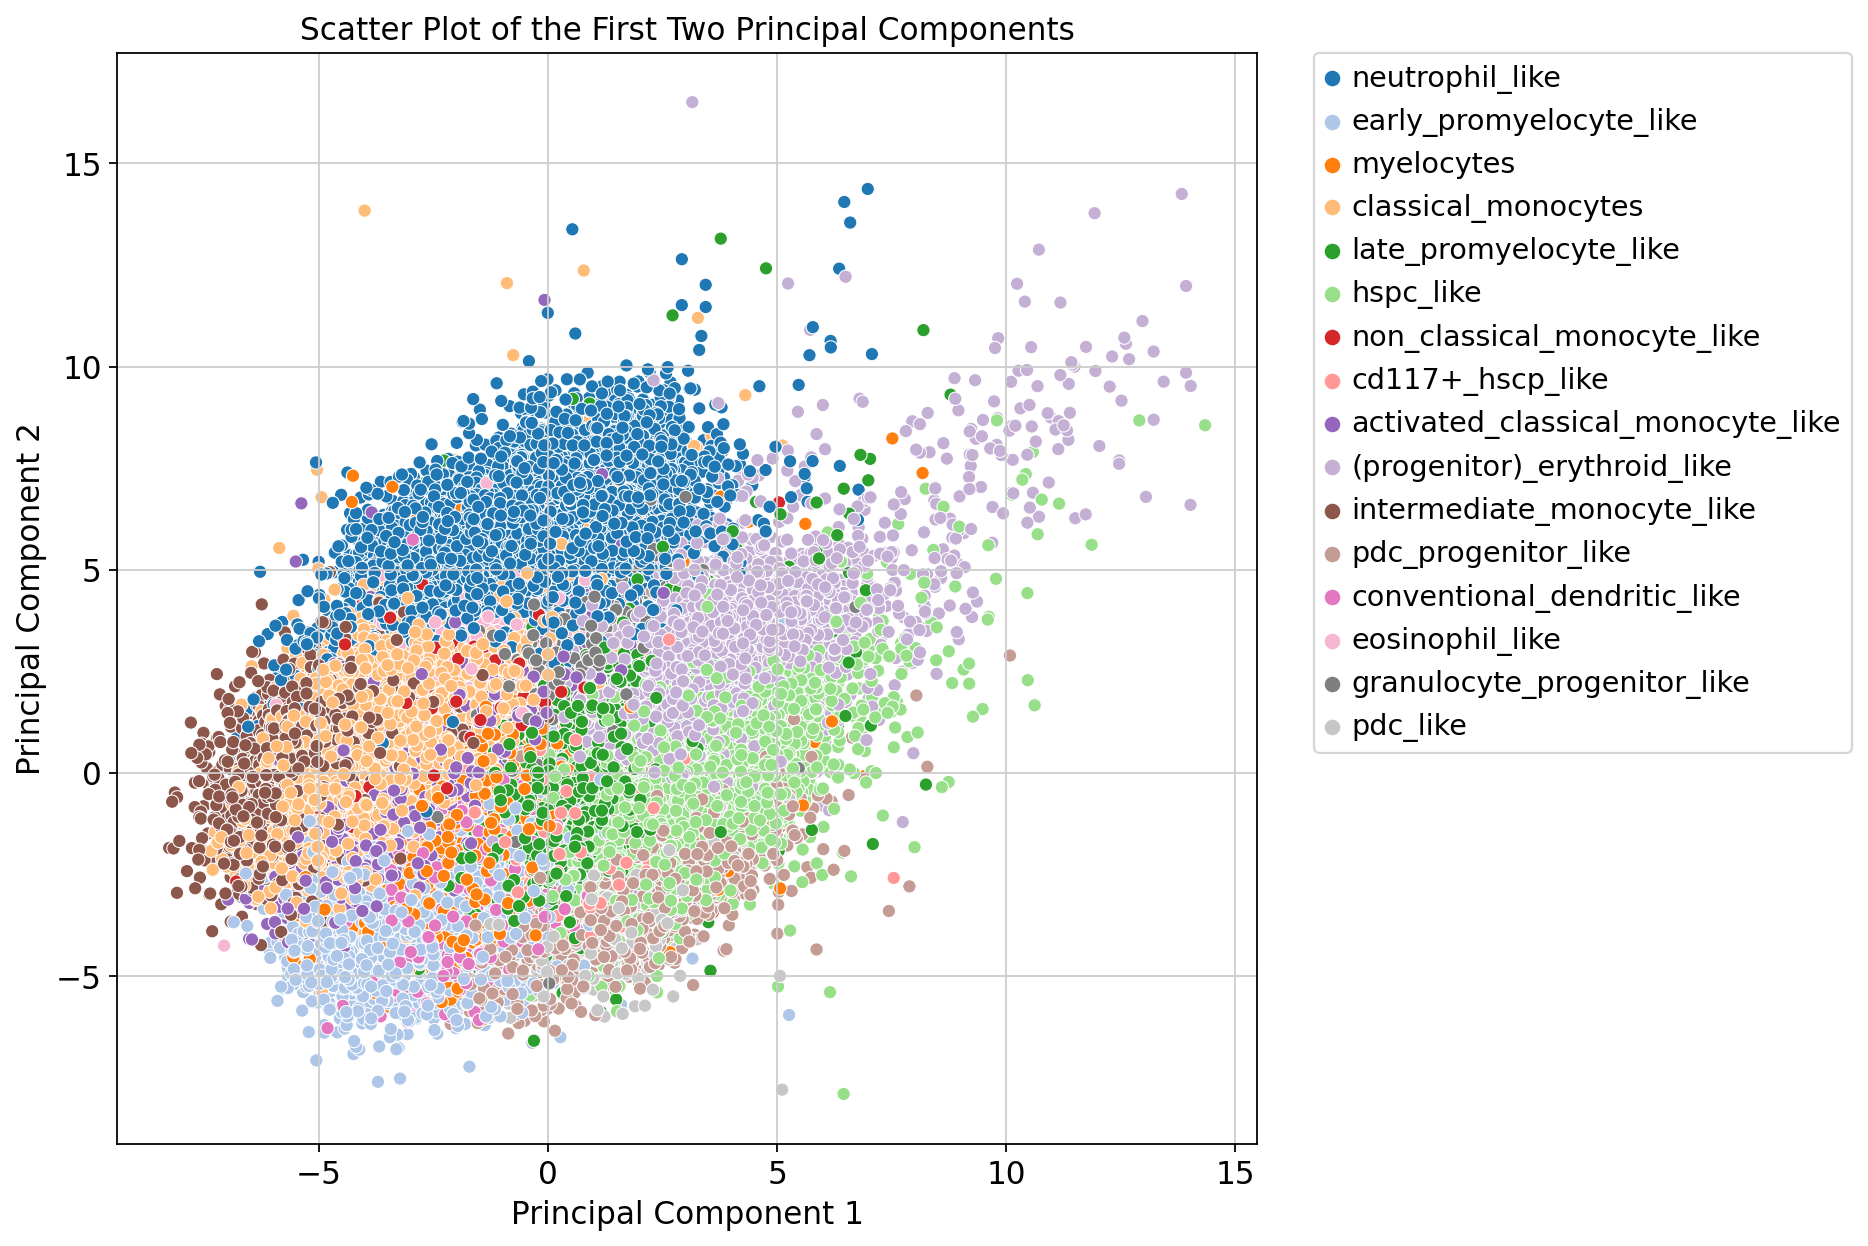

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Creating the scatter plot with seaborn for better color handling
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_sam, x='PC1', y='PC2', hue='Label', palette='tab20', legend='full')

# Adding grid, labels, and title
plt.grid(True)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()


In [181]:
#!/usr/bin/python
from numpy import zeros, sqrt, dot, diag
from numpy.linalg import svd, LinAlgError
from scipy.linalg import svd as scipy_svd

class FrequentDirections:
    def __init__(self , d, ell):
        self.d = d
        self.ell = ell
        self.m = 2*self.ell
        self._sketch = zeros( (self.m, self.d) ) 
        self.nextZeroRow = 0
                 
    def append(self,vector):     
        if self.nextZeroRow >= self.m:
            self.__rotate__()
        self._sketch[self.nextZeroRow,:] = vector 
        self.nextZeroRow += 1
        
    def __rotate__(self):
        try:
            [_,s,Vt] = svd(self._sketch , full_matrices=False)
        except LinAlgError as err:
            [_,s,Vt] = scipy_svd(self._sketch, full_matrices = False)

        if len(s) >= self.ell:
            sShrunk = sqrt(s[:self.ell]**2 - s[self.ell-1]**2)
            self._sketch[:self.ell:,:] = dot(diag(sShrunk), Vt[:self.ell,:])
            self._sketch[self.ell:,:] = 0
            self.nextZeroRow = self.ell
        else:
            self._sketch[:len(s),:] = dot(diag(s), Vt[:len(s),:])
            self._sketch[len(s):,:] = 0
            self.nextZeroRow = len(s)
         
    def get(self):
        return self._sketch[:self.ell,:]
    


In [165]:
# from numpy import zeros, sqrt, dot, diag
# from numpy.linalg import svd, LinAlgError
# from scipy.linalg import svd as scipy_svd

# class FrequentDirections:
#     def __init__(self, d, ell):
#         self.d = d
#         self.ell = ell
#         self.m = 2 * self.ell
#         self._sketch = zeros((self.m, self.d))
#         self._indices = []  # Store indices of the original rows
#         self.nextZeroRow = 0
                 
#     def append(self, vector, index):
#         if self.nextZeroRow >= self.m:
#             self.__rotate__()
#         self._sketch[self.nextZeroRow, :] = vector
#         if len(self._indices) < self.m:
#             self._indices.append(index)
#         else:
#             self._indices[self.nextZeroRow] = index
#         self.nextZeroRow += 1
        
#     def __rotate__(self):
#         try:
#             [_, s, Vt] = svd(self._sketch, full_matrices=False)
#         except LinAlgError:
#             [_, s, Vt] = scipy_svd(self._sketch, full_matrices=False)

#         retained_indices = []
#         if len(s) >= self.ell:
#             sShrunk = sqrt(s[:self.ell]**2 - s[self.ell-1]**2)
#             self._sketch[:self.ell, :] = dot(diag(sShrunk), Vt[:self.ell, :])
#             retained_indices = self._indices[:self.ell]
#             self._sketch[self.ell:, :] = 0
#             self.nextZeroRow = self.ell
#         else:
#             self._sketch[:len(s), :] = dot(diag(s), Vt[:len(s), :])
#             retained_indices = self._indices[:len(s)]
#             self._sketch[len(s):, :] = 0
#             self.nextZeroRow = len(s)
        
#         self._indices = retained_indices

#     def get(self):
#         return self._sketch[:self.ell, :], self._indices

# # Usage example
# # fd = FrequentDirections(d, ell)
# # for i, row in enumerate(data):
# #     fd.append(row, i)
# # sketch, indices = fd.get()


In [182]:
start_time = time.time()

n,d = X.shape
# num sketches
ell = 121500

                                                                                                                                                                                                                                                                                                                     

# This is where the sketching actually happens
sketcher = FrequentDirections(d,ell)
for i in range(n):
    row = X[i,:]
    sketcher.append(row)
sketch = sketcher.get()



elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 5.407233238220215 seconds


In [184]:
import numpy as np
import hashlib

class RowHashmap:
    def __init__(self, reference_matrix):
        self._hash_map = {}
        self._create_hashmap(reference_matrix)

    def _hash_row(self, row):
        row_bytes = row.tobytes()
        return hashlib.md5(row_bytes).hexdigest()

    def _create_hashmap(self, matrix):
        for index, row in enumerate(matrix):
            row_hash = self._hash_row(row)
            # Assuming each row is unique; otherwise, this could be a list to handle duplicates
            self._hash_map[row_hash] = index

    def query_indices(self, query_matrix):
        indices = []
        for row in query_matrix:
            row_hash = self._hash_row(row)
            if row_hash in self._hash_map:
                indices.append(self._hash_map[row_hash])
            else:
                indices.append(None)  # or -1, or any indicator for 'not found'
        return indices

# Example Usage
reference_matrix = X
query_matrix = sketch

hashmap = RowHashmap(reference_matrix)
result_indices = hashmap.query_indices(query_matrix)
# print(result_indices)  # Output will be [1, None] indicating that the first query row is at index 1 in the reference matrix, and the second row is not found.


In [190]:
X.min()

-53.4224915508701

In [188]:
sketch.max()

832.0212975766661

In [180]:
sketch[100,:]

array([ 0.6305657 ,  0.47844432,  0.74875807, -0.02898835,  0.5424304 ,
       -0.5228557 ,  0.25679623,  0.0766238 ,  1.47872119,  0.73919755,
       -0.29984631,  0.17568119,  0.49087307, -0.04021398, -1.87496424,
       -0.2615417 , -0.47266268, -1.36094088, -0.41392199, -0.07394211,
        0.37984333,  1.14721569])

In [159]:
X[0,:].shape

(22,)

In [161]:
start_time = time.time()

n,d = X.shape
# num sketches
ell = 121500

                                                                                                                                                                                                                                                                                                                     

# This is where the sketching actually happens
sketcher = FrequentDirections(d,ell)
for i in range(n):
    row = X[i,:]
    sketcher.append(row)
sketch = sketcher.get()



elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 5.371711492538452 seconds


In [163]:
sketch.shape

(121500, 22)

In [ ]:
start_time = time.time()

approxCovarianceMatrix = dot(sketch.transpose(),sketch)

elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [47]:
ad_ref = adata_ref.copy()
ad_ref.X = X_pca

In [99]:
# Generate another batch of data for fsbs
from FACS_Sampling.methods.methods import bin_sample
start_time = time.time()

seed = 123
np.random.seed(seed)
new_seed = np.random.randint(100000)
# %time
ps, _ = bin_sample(ad_ref, n_bins=20, s_size=500, seed=new_seed)
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 82.07967233657837 seconds


In [48]:
# Generate another batch of data for fsbs
from FACS_Sampling.methods.methods import sample_random
start_time = time.time()

seed = 123
np.random.seed(seed)
new_seed = np.random.randint(100000)
rs = sample_random(ad_ref, s_size=143600, seed=new_seed)
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.09369230270385742 seconds


In [49]:
rs.shape

(143600,)

In [50]:
start_time = time.time()

# Compute PCs.
from fbpca import pca
U, s, Vt = pca(X, k=22) # E.g., 22 PCs.
X_dimred = U[:, :22] * s[:22]
# Now, you are ready to sketch!

# Sketch.
from geosketch import gs
N = 143564 # Number of samples to obtain from the data set.
sketch_index = gs(X_dimred, N, replace=False)

X_sketch = X_dimred[sketch_index]
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 450.847216129303 seconds


#### In the next cell I am trying to use same PCs as I was using in our method to see the differences in the performance

In [25]:
start_time = time.time()

# Compute PCs.
from fbpca import pca
k = 4  # E.g., 22 PCs.
U, s, Vt = pca(X, k=k) 
X_dimred = U[:, :k] * s[:k]
# Now, you are ready to sketch!

# Sketch.
from geosketch import gs
N = 5320 # Number of samples to obtain from the data set.
sketch_index = gs(X_dimred, N, replace=False)

X_sketch = X_dimred[sketch_index]
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 64.70038866996765 seconds


In [58]:
# new_fsbs = adata_ref[ps].copy()
new_random = adata_ref[rs].copy()

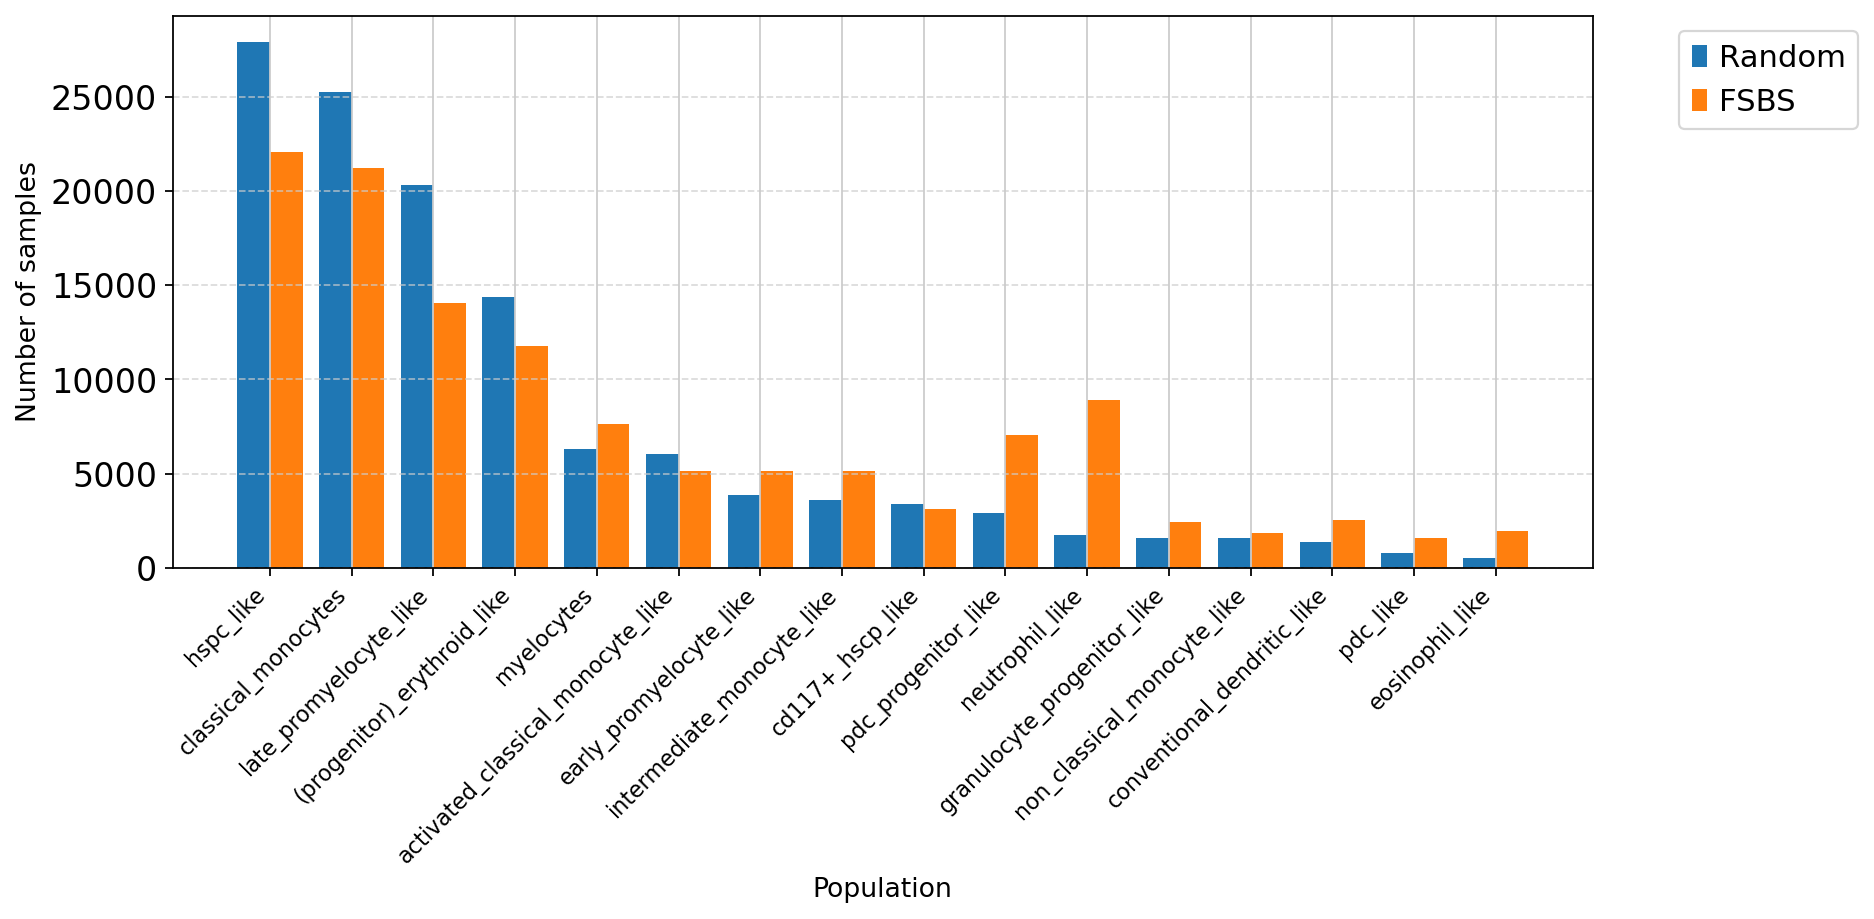

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc

def plot_improved_population_distribution(adata_list, labels, adata_ref):
    # Create a DataFrame to hold the count data
    pop_counts = pd.DataFrame({
        label: adata.obs['population'].value_counts(normalize=False)# * 100
        for adata, label in zip(adata_list, labels)
    })

    # Sort the populations based on the counts in adata_ref
    ref_order = adata_ref.obs['population'].value_counts().index
    pop_counts = pop_counts.reindex(ref_order)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    n = len(pop_counts.columns)
    bar_width = 0.8 / n
    indices = np.arange(len(pop_counts))

    for i, label in enumerate(labels):
        ax.bar(indices + i * bar_width, pop_counts[label], bar_width, label=label)

    # Improve the aesthetics
    ax.set_xlabel('Population', fontsize=12)
    ax.set_ylabel('Number of samples', fontsize=12)
    ax.set_xticks(indices + bar_width * (n - 1) / 2)
    ax.set_xticklabels(pop_counts.index, rotation=45, ha='right', fontsize=10)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Example usage
plot_improved_population_distribution([adata_random, adata_fsbs],
                                      ['Random', 'FSBS'], adata_ref)


In [172]:
for d in [adata_random, adata_ref[output_3d],adata_ref[output_4d], adata_ref[inds], adata_fsbs]:
    print(d.shape)

(121676, 22)
(121535, 22)
(121230, 22)
(56176, 22)
(121676, 22)


In [107]:
output_3d

array([      1,       2,       6, ..., 1999898, 1999916, 1999990])

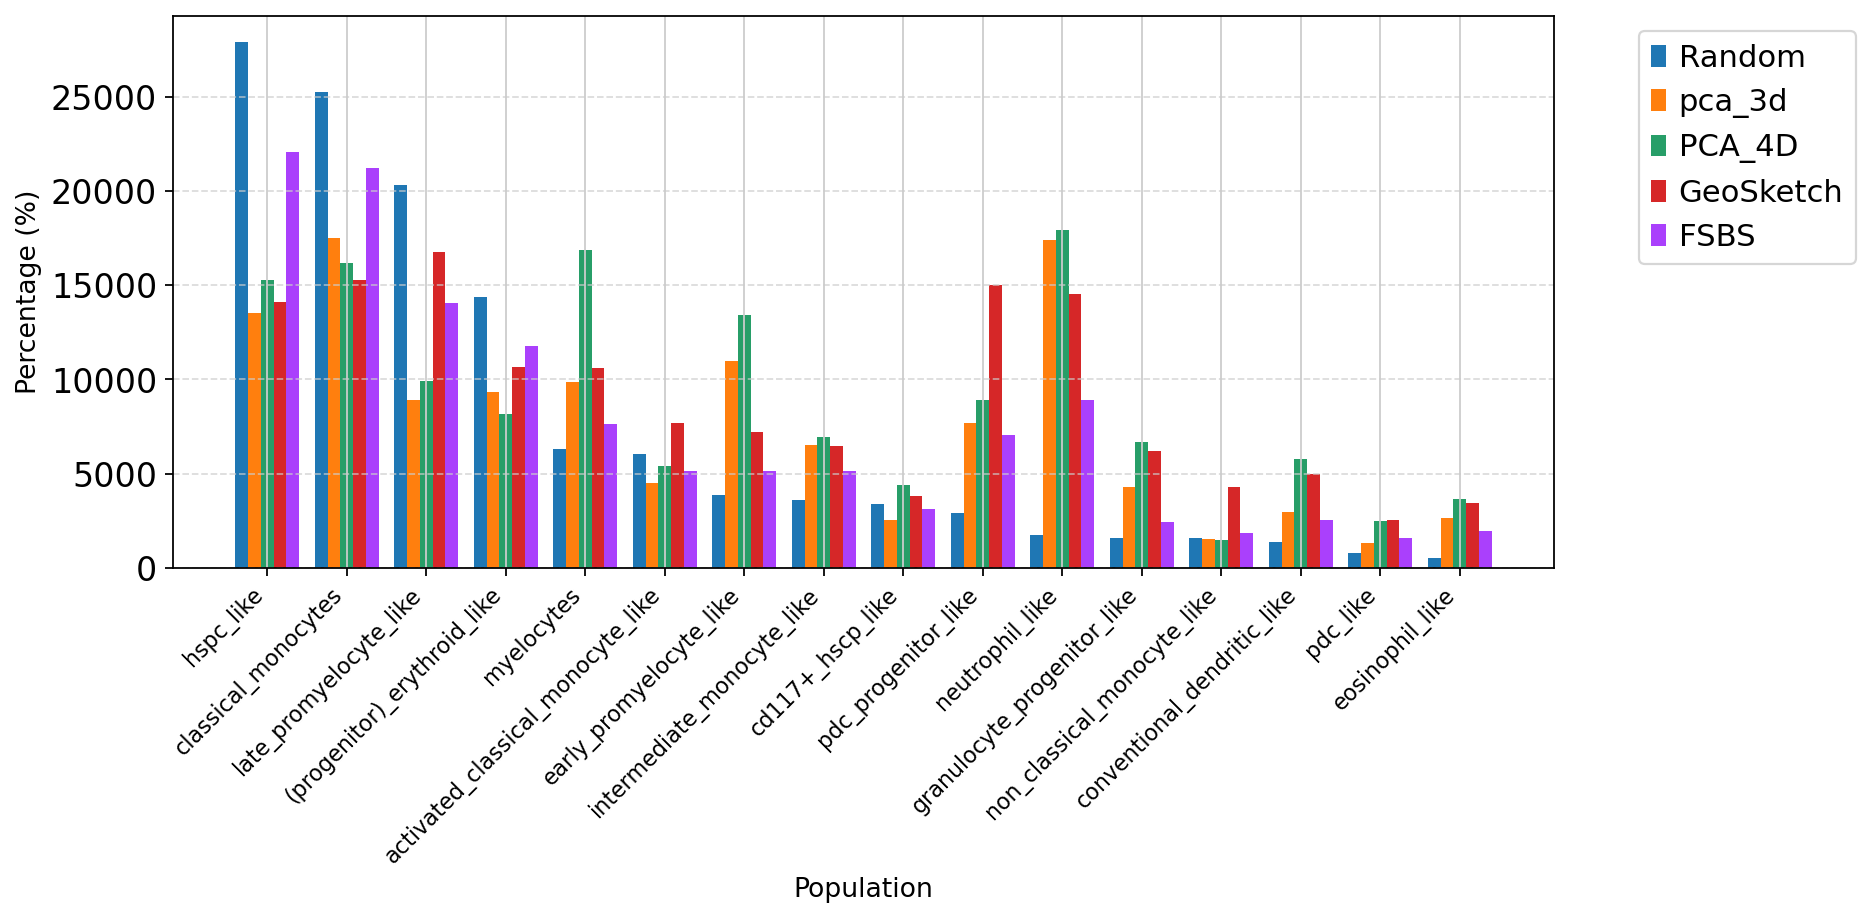

In [123]:

plot_improved_population_distribution([adata_random, adata_ref[output_3d],
                                       adata_ref[out4d], adata_ref[sketch_index],  adata_fsbs],
                                      ['Random', 'pca_3d', 'PCA_4D', 'GeoSketch', 'FSBS' ], adata_ref)

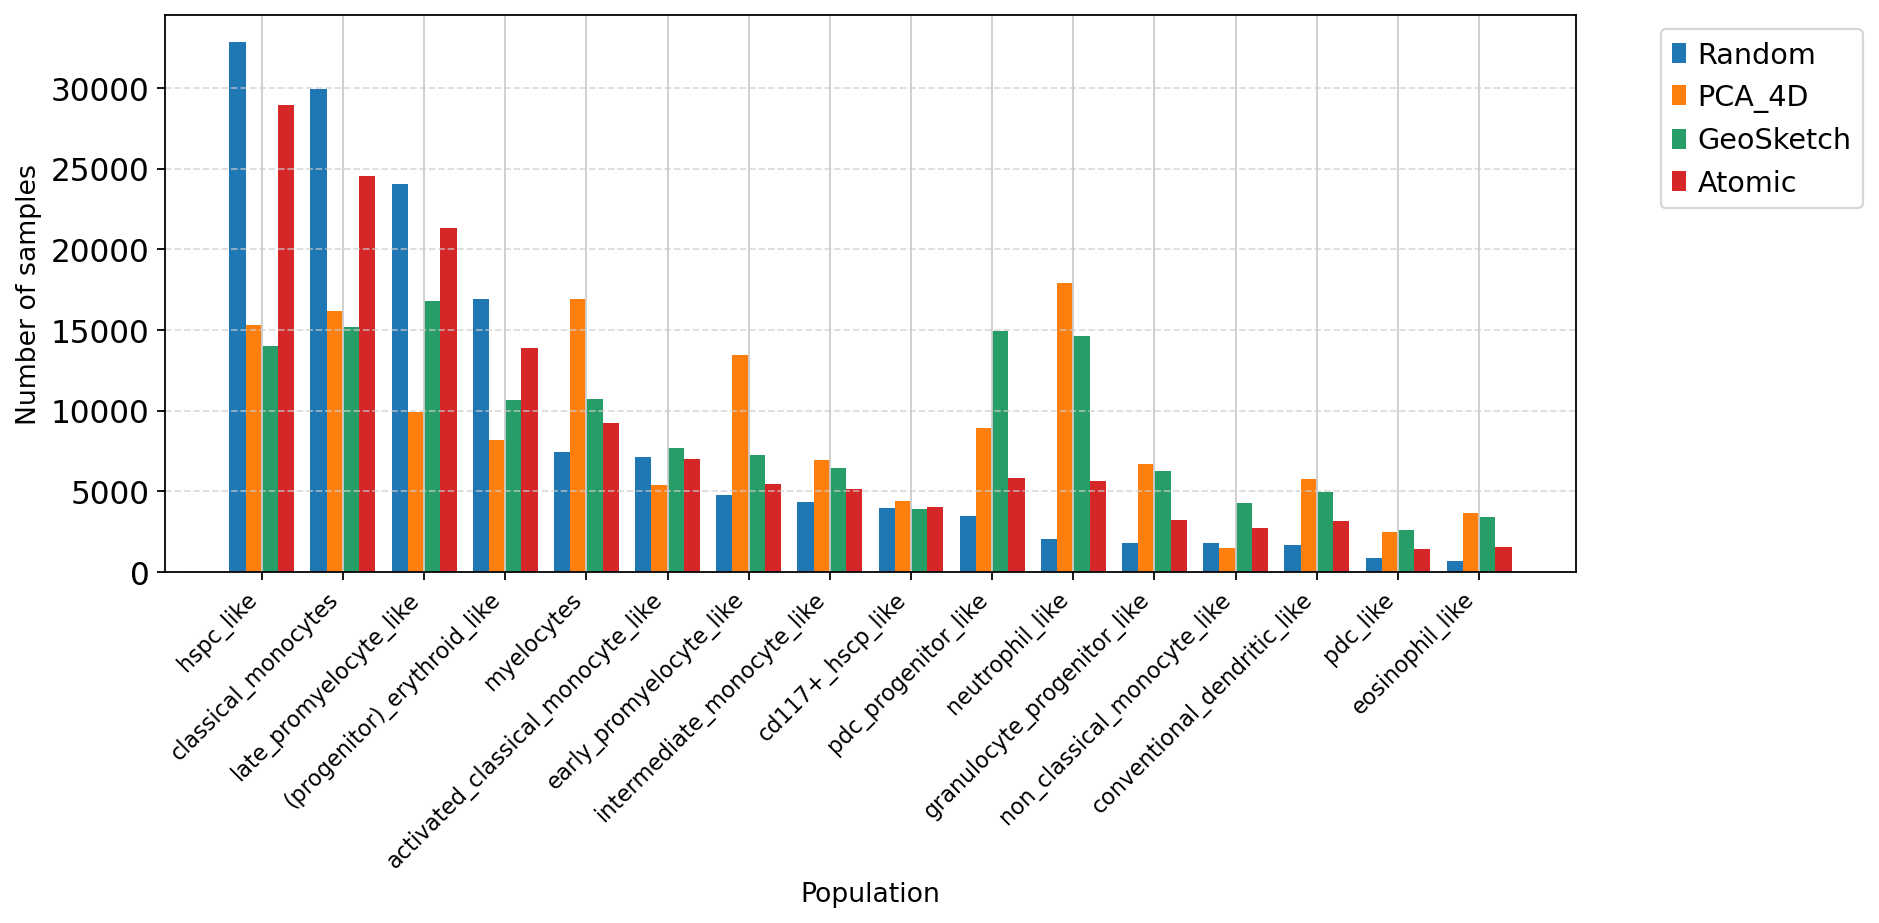

In [59]:
plot_improved_population_distribution([new_random, adata_ref[out4d], adata_ref[sketch_index], adata_ref[atomic_indices]],
                                      ['Random', 'PCA_4D', 'GeoSketch', 'Atomic'], adata_ref)

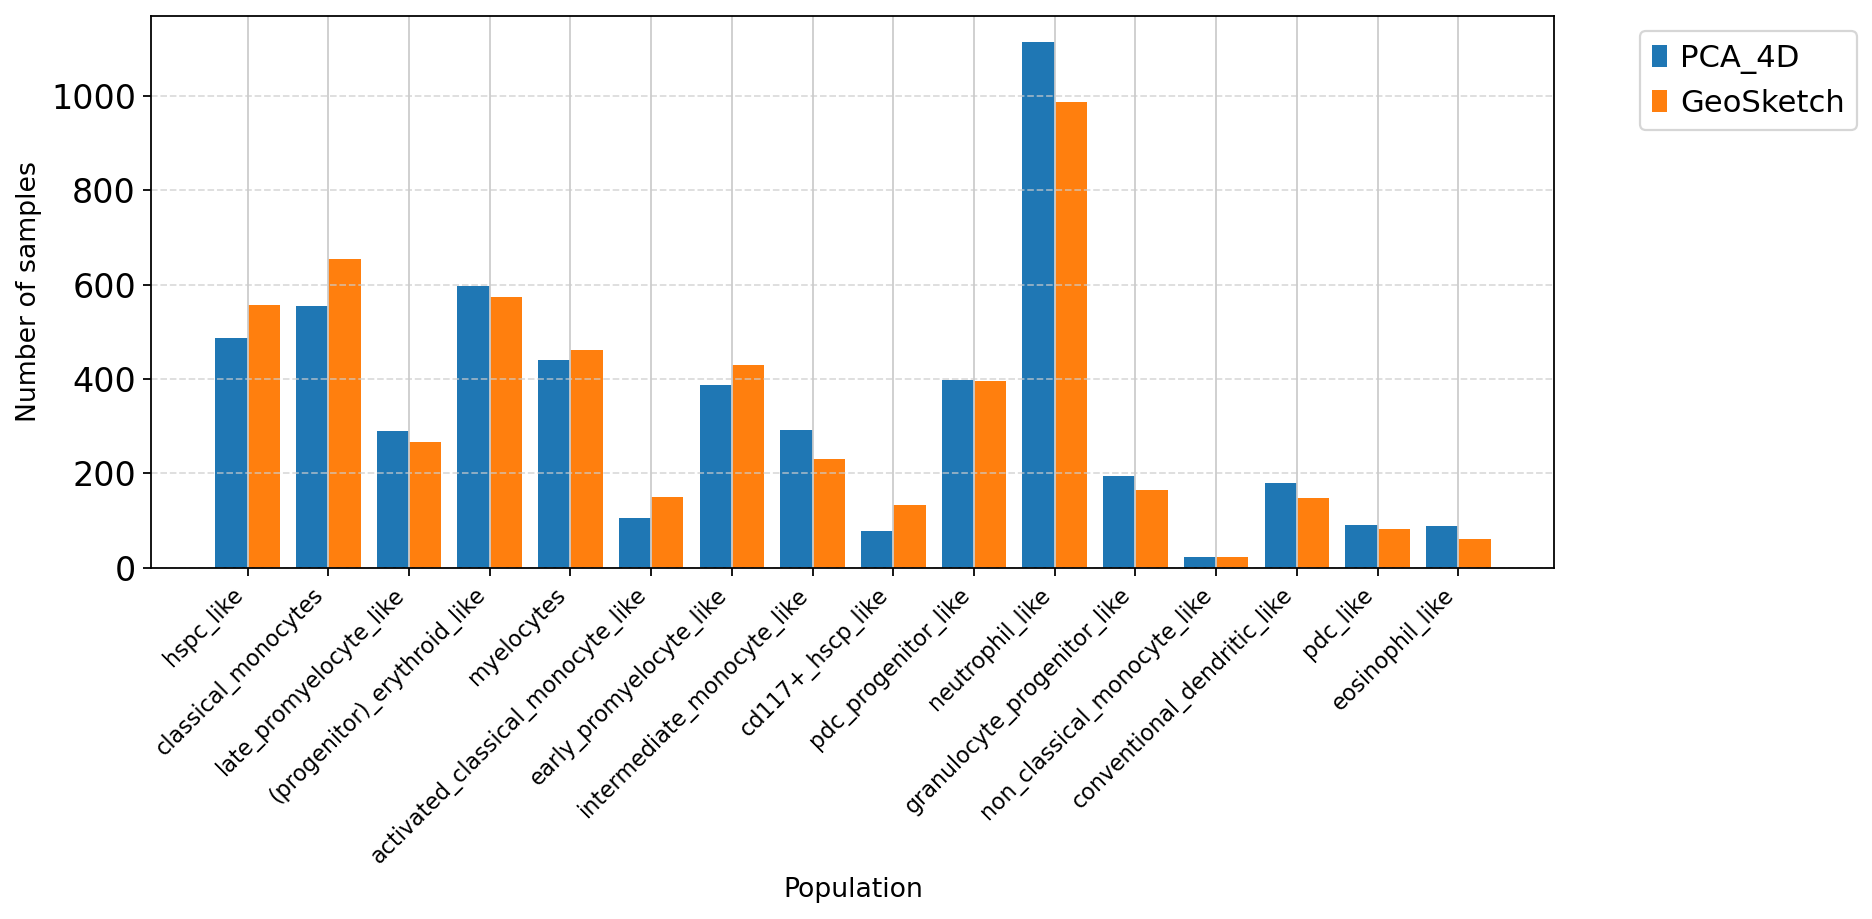

In [27]:
plot_improved_population_distribution([ adata_ref[out4d], adata_ref[sketch_index]],
                                      ['PCA_4D', 'GeoSketch'], adata_ref)

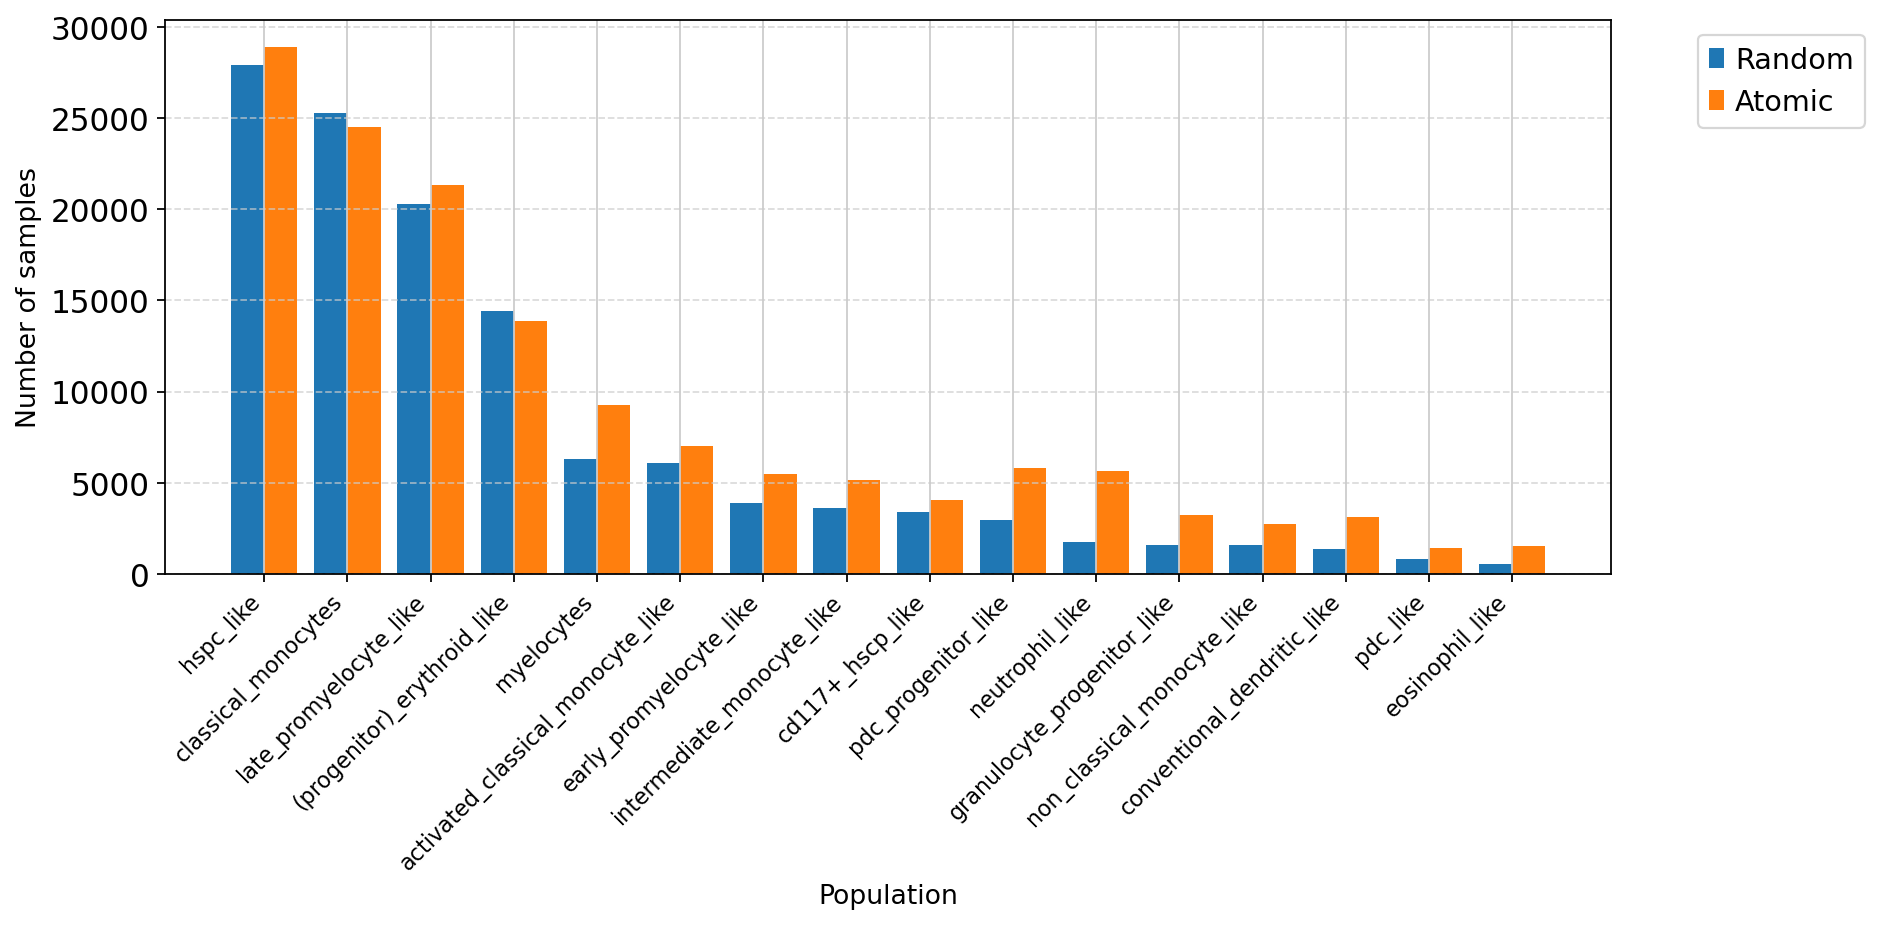

In [56]:
plot_improved_population_distribution([ new_, adata_ref[atomic_indices]],
                                      ['Random', 'Atomic'], adata_ref)

In [57]:
adata_random

AnnData object with n_obs × n_vars = 121676 × 22
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population'

In [122]:
adata_ref[out4d]

View of AnnData object with n_obs × n_vars = 143564 × 22
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population'

In [115]:
adata_ref[sketch_index]

View of AnnData object with n_obs × n_vars = 143564 × 22
    obs: 'old_index', 'unique_id', 'sex', 'age', 'subtype', 'type', 'blastcount', 'survival_sorter', 'run', 'sample_id', 'alignment_mc_aligned', 'flowsom_cluster', 'flowsom_metacluster', 'population'

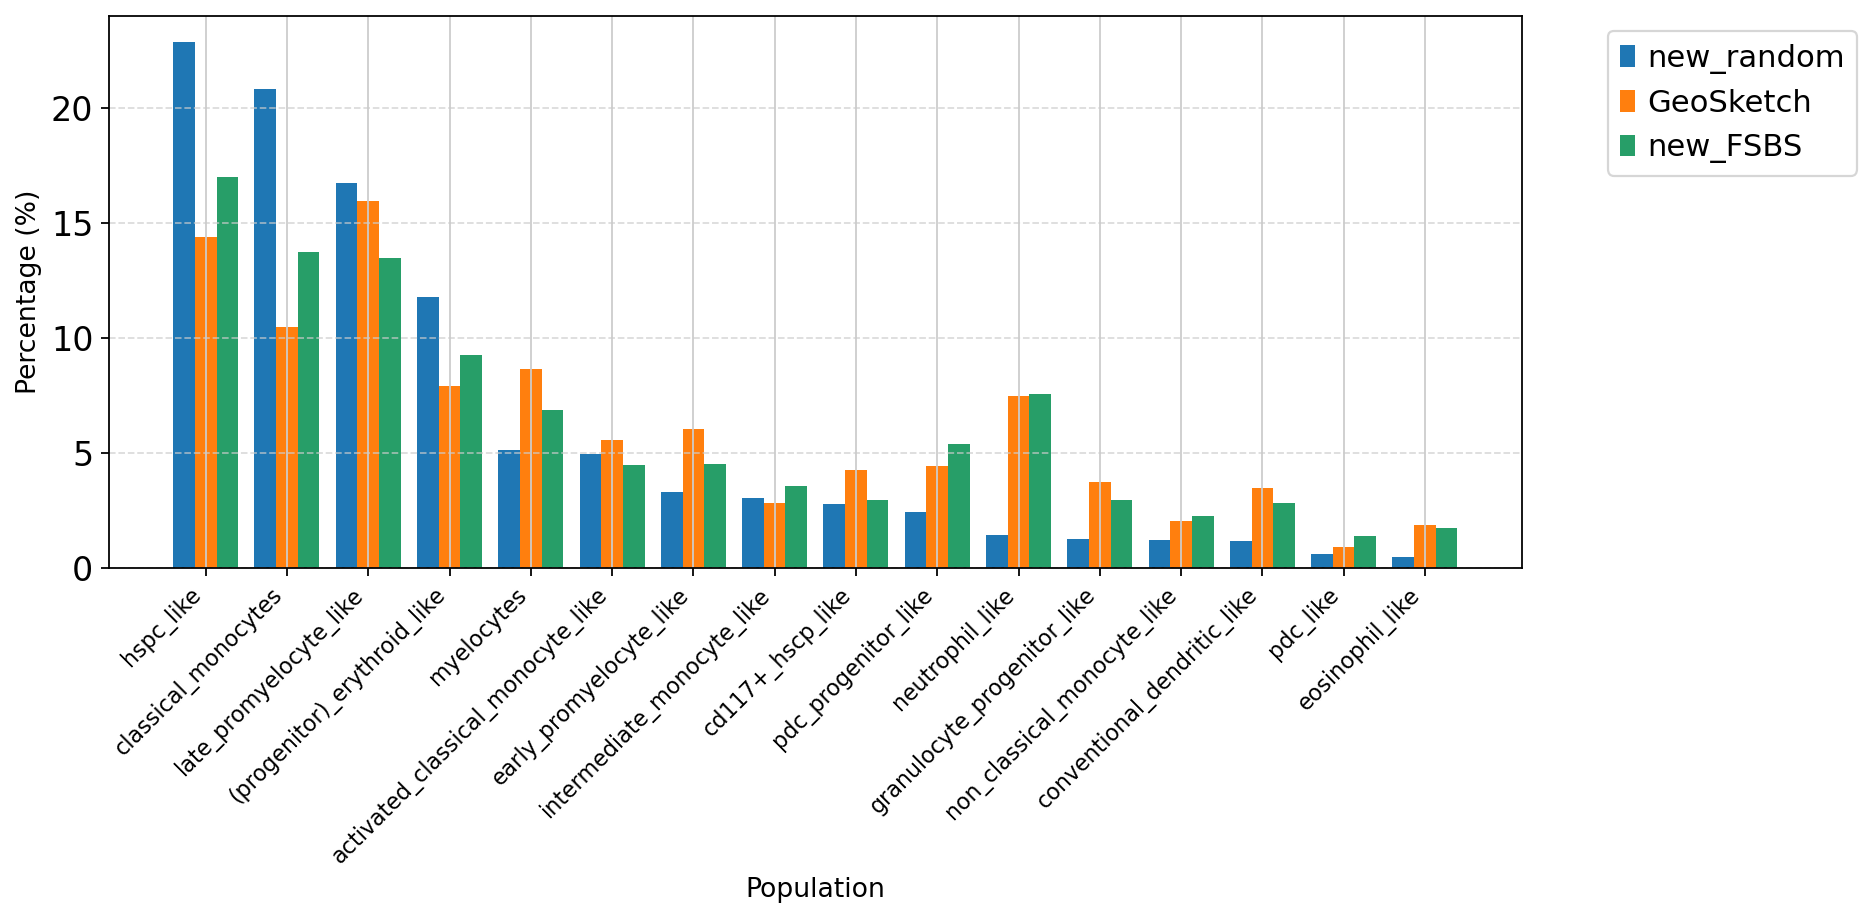

In [57]:

plot_improved_population_distribution([new_random, adata_ref[sketch_index].copy(), new_fsbs],
                                      ['new_random', 'GeoSketch', 'new_FSBS'], adata_ref)

In [5]:
adata_ref.var_names

Index(['cd33_aligned', 'hla_dr_aligned', 'cd19_cd3_aligned', 'cd11b_aligned',
       'cd66b_aligned', 'cd16_aligned', 'cd163_aligned', 'cd14_aligned',
       'cd2_aligned', 'siglec8_aligned', 'cd13_aligned', 'cd45_aligned',
       'cd141_aligned', 'cd15_aligned', 'cd123_aligned', 'cd11c_aligned',
       'cd117_aligned', 'cd45ra_aligned', 'cd34_aligned', 'itgb7_aligned',
       'cd88_cd89_aligned', 'fcer1a_aligned'],
      dtype='object')

In [7]:
adata_ref.obs.head()

,old_index,unique_id,sex,age,subtype,type,blastcount,survival_sorter,run,sample_id,alignment_mc_aligned,flowsom_cluster,flowsom_metacluster,population
0,30168021,20021_9,m,64,"nk,_npm1_wt;_flt3_itd_(<0,5)",pb,90,"69,2",9,20021,10,185,28,late_promyelocyte_like
1,6299979,115_3,m,54,"complex,_del5",bm,30,"36,3",3,115,14,16,1,pdc_progenitor_like
2,18682804,359_6,m,72,"nk,_npm1+_flt3_itd_(<0,5)",pb,no_punction,"56,2",6,359,3,80,17,neutrophil_like
3,18092591,359_6,m,72,"nk,_npm1+_flt3_itd_(<0,5)",pb,no_punction,"56,2",6,359,12,142,24,(progenitor)_erythroid_like
4,6997736,183_3,m,61,trisomy_8,bm,100,"65,6",3,183,13,71,2,hspc_like


In [8]:
adata_ref.obs['subtype'].value_counts().keys()

CategoricalIndex(['nk,_npm1+_flt3_itd_(>0,5)', 'nk,_npm1+',
                  'nk,_npm1_wt;_flt3_itd_(<0,5)', 'nk,_npm1+_flt3_itd_(<0,5)',
                  'inv(16)', 'trisomy_8', 'nk,_npm1_wt,_flt3_wt', 'apl',
                  'complex,_tp53', 'idh2', 'nk,_npm1_wt;_flt3_itd_(>0,5)',
                  't(8;21),_c_kit', 'nk,_cebpa', 'healthy', 'evi1', 'del5',
                  'complex,_del5', 't(8;21)', 'idh1'],
                 categories=['apl', 'complex,_del5', 'complex,_tp53', 'del5', ..., 'nk,_npm1_wt;_flt3_itd_(>0,5)', 't(8;21)', 't(8;21),_c_kit', 'trisomy_8'], ordered=False, dtype='category', name='subtype')

## Clustering tutorial Scanpy

normalizing counts per cell
    finished (0:00:00)


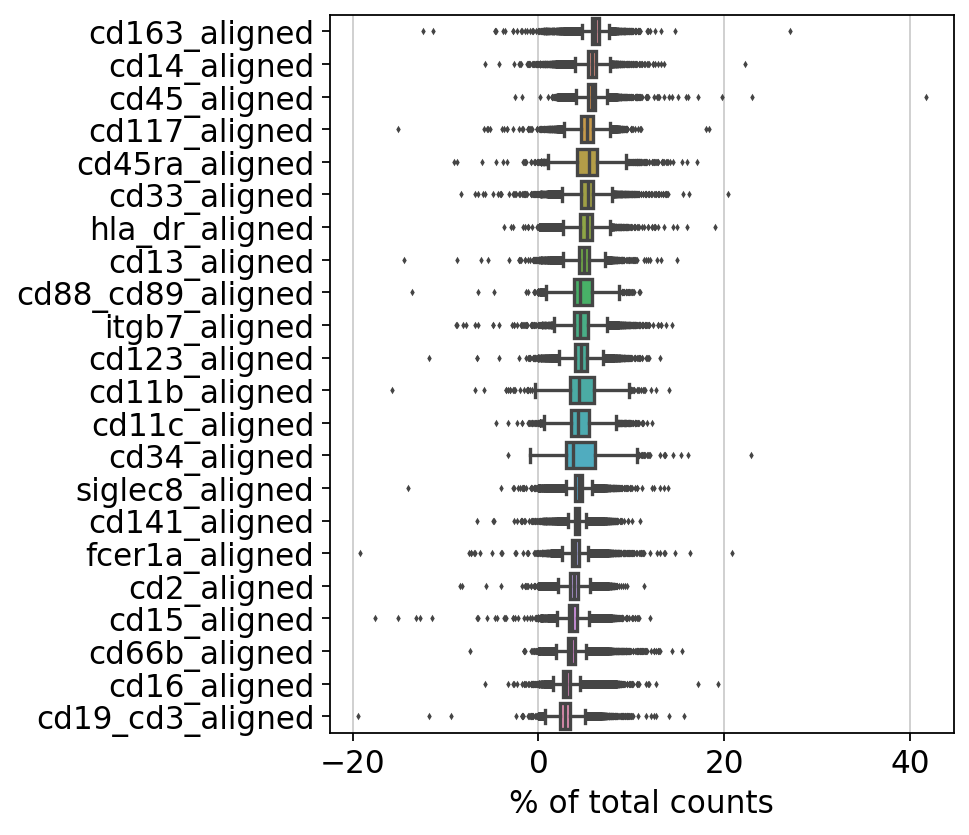

In [5]:
sc.pl.highest_expr_genes(adata_ref, n_top=22, )

normalizing counts per cell
    finished (0:00:00)


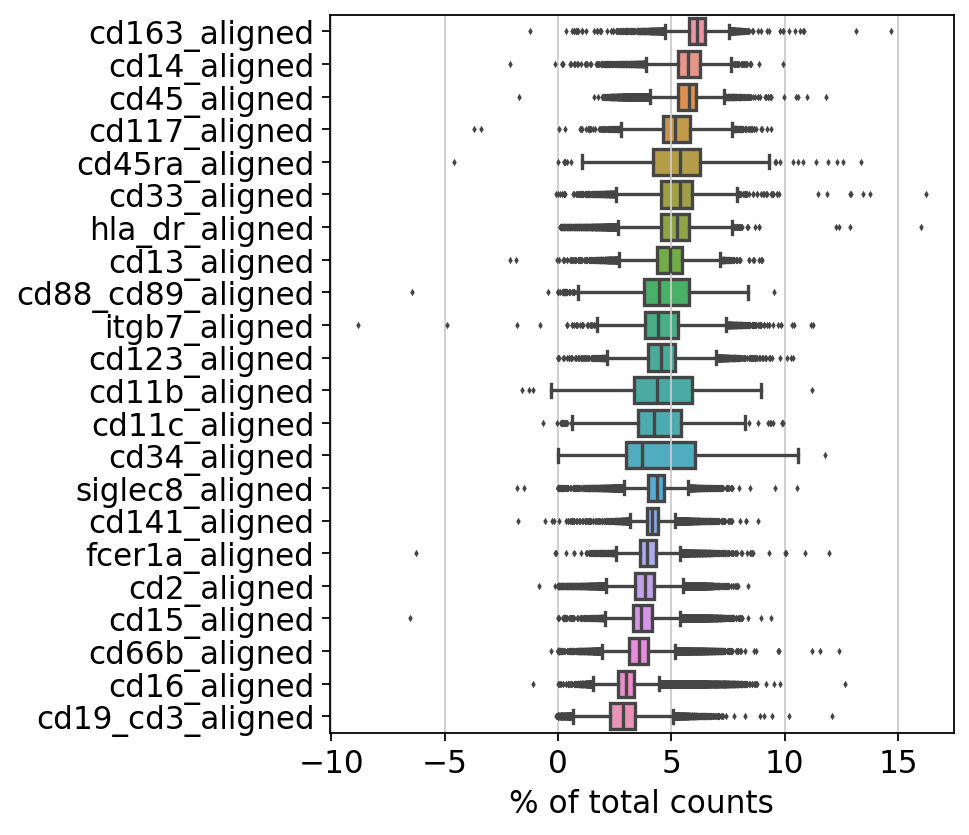

In [6]:
sc.pl.highest_expr_genes(adata_random, n_top=22, )

normalizing counts per cell
    finished (0:00:00)


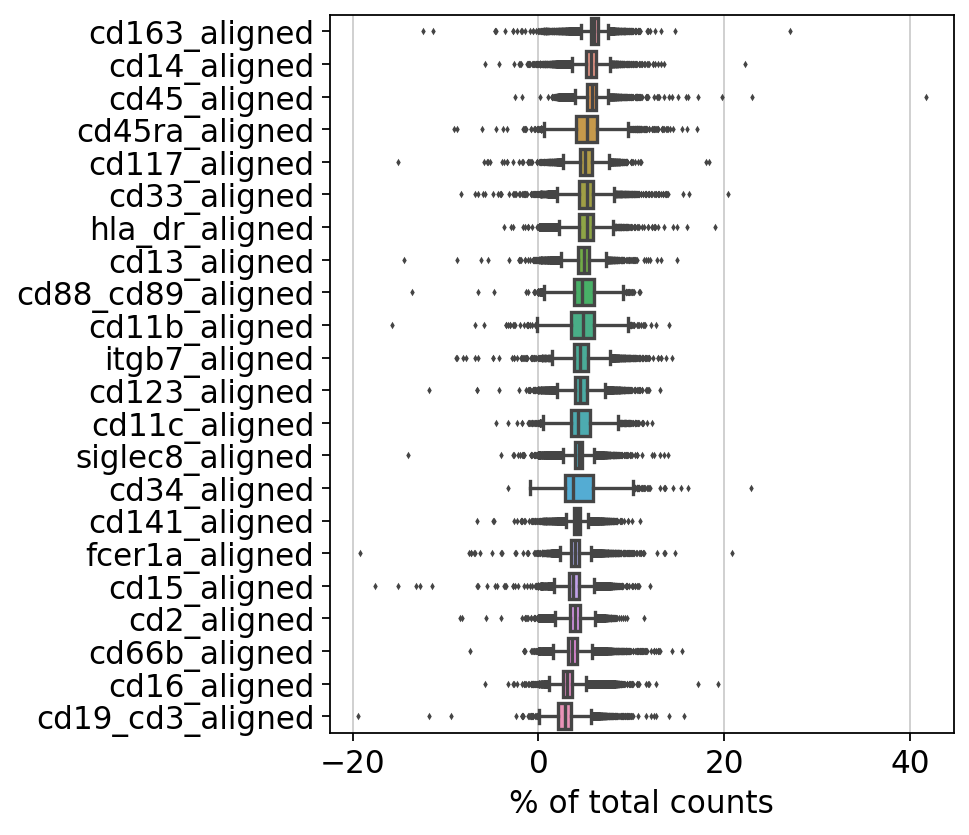

In [7]:
sc.pl.highest_expr_genes(adata_fsbs, n_top=22, )

## pca

In [8]:
sc.tl.pca(adata_ref, svd_solver='arpack')

computing PCA
    with n_comps=21
    finished (0:00:04)


In [9]:
sc.tl.pca(adata_random, svd_solver='arpack')

computing PCA
    with n_comps=21
    finished (0:00:00)


In [10]:
sc.tl.pca(adata_fsbs, svd_solver='arpack')

computing PCA
    with n_comps=21
    finished (0:00:00)


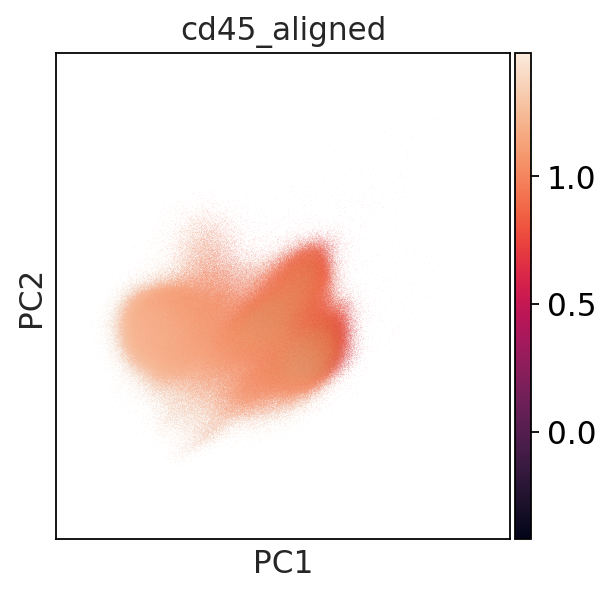

In [27]:
sc.pl.pca(adata_ref, color='cd45_aligned')

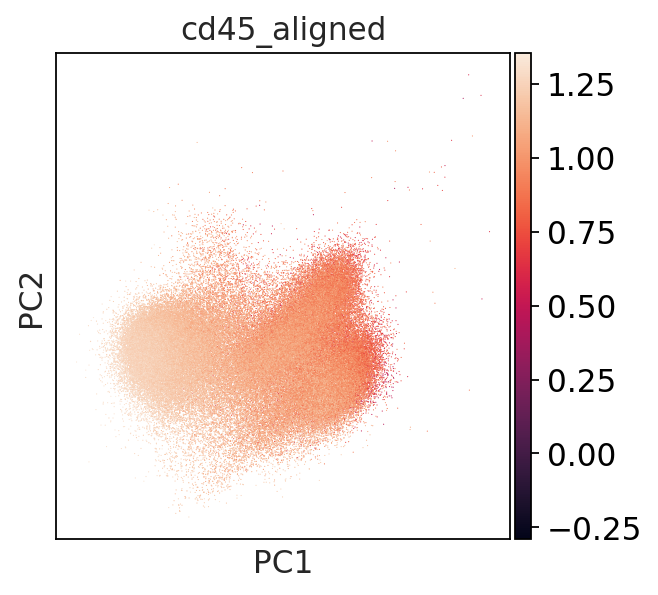

In [25]:
sc.pl.pca(adata_random, color='cd45_aligned')

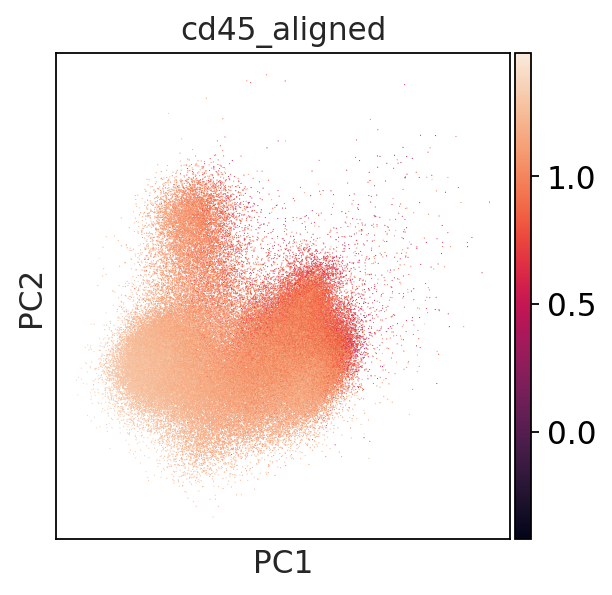

In [26]:
sc.pl.pca(adata_fsbs, color='cd45_aligned')

# Maybe based on the first pcs, we can show that we have a better diversity

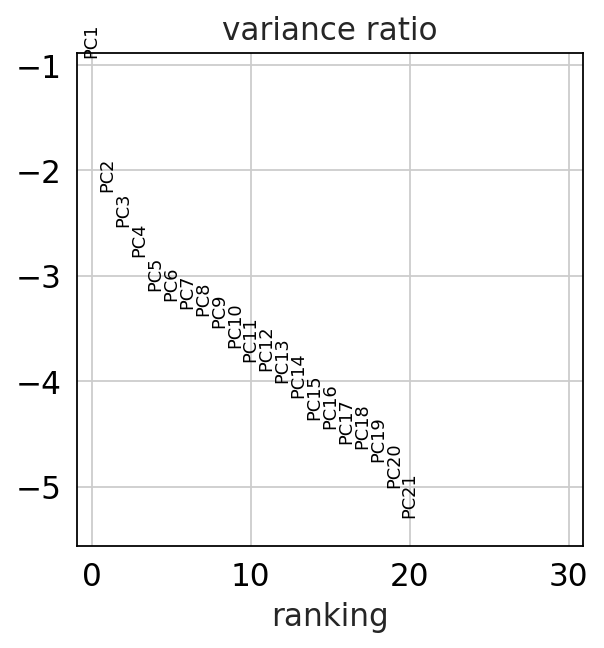

In [28]:
sc.pl.pca_variance_ratio(adata_ref, log=True)

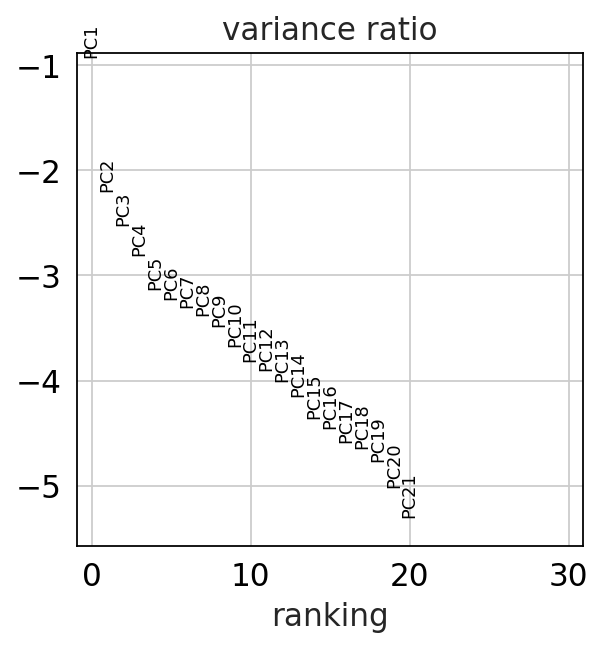

In [29]:
sc.pl.pca_variance_ratio(adata_random, log=True)

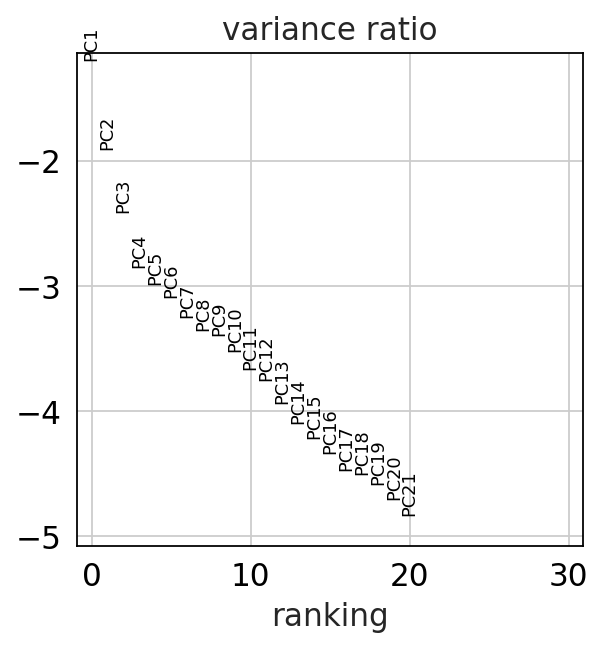

In [30]:
sc.pl.pca_variance_ratio(adata_fsbs, log=True)

In [11]:
sc.pp.neighbors(adata_ref, n_neighbors=10)

computing neighbors
    using data matrix X directly



KeyboardInterrupt

